# Proyect 1 Animals Image Dataset

Project developed by Andrés Malón and Roberto Aldanondo

In [1]:
# !pip install torchvision
import torch, torchvision, PIL
import os
import pandas as pd
import numpy as np
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
project_dir = Path.cwd().parent
data_dir = project_dir / 'data'
path_names_category = data_dir / 'name of the animals.txt'
print(path_names_category)

C:\Users\Rober\Documents\Máster ML\Software Development applied to ML\Proyecto 1 Develop and Software (1)\data\name of the animals.txt


In [4]:
if path_names_category.exists():
    print("✅ El archivo existe")
else:
    print("❌ El archivo NO existe")
    print("Ruta buscada:", path_names_category)

✅ El archivo existe


In [5]:
# path_names_category = os.path.join(data_dir, 'name of the animals.txt')
path_names_category = data_dir / 'name of the animals.txt'

with open(path_names_category, 'r') as f:
    category_names = [line.strip() for line in f if line.strip()]  # Lista limpia sin espacios
print(category_names)


['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


In [6]:
# path_images_bat = os.path.join(data_dir, 'bat')
def label_func(fname):
    return fname.parent.name

def obtener_imagenes_de_categoria(base_path, categoria):
    carpeta_categoria = os.path.join(base_path, categoria)
    if not os.path.exists(carpeta_categoria):
        print(f"La carpeta {carpeta_categoria} no existe.")
        return torch.tensor([])

    # Obtener lista de archivos en la carpeta que sean imágenes (por ejemplo jpg, png)
    imagenes = [f for f in os.listdir(carpeta_categoria)
                if os.path.isfile(os.path.join(carpeta_categoria, f))
                and f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]
    return imagenes

In [7]:
animals_dir = os.path.join(data_dir, 'mini_animals')
full_animals_dir = os.path.join(data_dir, 'animals')


# Diccionario para guardar la media por clase
medias_rgb = {}
for animal in category_names:
    imagenes = obtener_imagenes_de_categoria(animals_dir, animal)
    if animal == 'antelope':
        print(imagenes)

['antelope_0.jpg', 'antelope_1.jpg', 'antelope_10.jpg', 'antelope_11.jpg', 'antelope_12.jpg', 'antelope_13.jpg', 'antelope_14.jpg', 'antelope_15.jpg', 'antelope_16.jpg', 'antelope_17.jpg', 'antelope_18.jpg', 'antelope_19.jpg', 'antelope_2.jpg', 'antelope_3.jpg', 'antelope_4.jpg', 'antelope_5.jpg', 'antelope_6.jpg', 'antelope_7.jpg', 'antelope_8.jpg', 'antelope_9.jpg']


In [8]:
animals_dir = os.path.join(data_dir, 'mini_animals')
carpeta_categoria = os.path.join(animals_dir, 'antelope')
foto_animal = os.path.join(carpeta_categoria, 'antelope_0.jpg')
if os.path.exists(carpeta_categoria):
    print("✅ El archivo existe")
else:
    print("❌ El archivo NO existe")
    print("Ruta buscada:", a)

✅ El archivo existe


In [9]:
plots_dir = project_dir / 'reports' / 'figures'

In [10]:
animals_dir = os.path.join(data_dir, 'mini_animals')

# Diccionario para guardar la media por clase
medias_rgb = {}
for animal in category_names:
    imagenes = obtener_imagenes_de_categoria(animals_dir, animal)
    # Listas para acumular valores por canal
    canales = []
    #Accedemos a la carpeta de la categoria
    carpeta_categoria = os.path.join(animals_dir, animal)

   
    for img_path in imagenes:
        ruta_foto = os.path.join(carpeta_categoria, img_path)

        img = Image.open(ruta_foto).convert("RGB")   # asegurar RGB
        arr = np.array(img, dtype=np.float32)

        # Calcular media por canal
        r_mean = arr[:, :, 0].mean()
        g_mean = arr[:, :, 1].mean()
        b_mean = arr[:, :, 2].mean()
        canales.append([r_mean, g_mean, b_mean])

    # Promedio total de la clase
    if canales:
        medias_rgb[animal] = np.mean(canales, axis=0)

print(medias_rgb)

{'antelope': array([147.73389, 137.66939, 110.73726], dtype=float32), 'badger': array([134.72995, 132.11362, 114.92546], dtype=float32), 'bat': array([76.88802 , 70.31449 , 55.094036], dtype=float32), 'bear': array([124.08887, 121.12724, 108.35636], dtype=float32), 'bee': array([163.43661, 150.62296, 111.69865], dtype=float32), 'beetle': array([165.05006, 151.75179, 121.57013], dtype=float32), 'bison': array([140.22078, 133.58247, 114.58372], dtype=float32), 'boar': array([114.83755, 114.89461,  97.09629], dtype=float32), 'butterfly': array([145.61215, 144.9283 , 124.22432], dtype=float32), 'cat': array([151.86125, 143.37392, 131.58733], dtype=float32), 'caterpillar': array([117.58899, 138.73262,  84.45494], dtype=float32), 'chimpanzee': array([113.34355, 114.45418,  92.13484], dtype=float32), 'cockroach': array([197.04387, 185.11765, 174.07248], dtype=float32), 'cow': array([123.70039, 125.48667, 102.67999], dtype=float32), 'coyote': array([138.57639 , 131.15355 , 114.116135], dtype=f

Creamos un dataframe que sea columna un color diferente

In [11]:
# medias_rgb: dict {class_name: [R,G,B]}
df = pd.DataFrame.from_dict(medias_rgb, orient='index', columns=['R','G','B'])
df.index.name = 'class'
df = df.sort_index()  # opcional
df
print(df.columns)
# Normalizar a 0-1 para algunos plots
df_norm = df / 255.0

Index(['R', 'G', 'B'], dtype='object')


In [12]:
df = pd.DataFrame.from_dict(medias_rgb, orient='index', columns=['R','G','B'])
df.index.name = 'class'

# Pasar 'class' del índice a columna
df = df.reset_index()

print(df.head())
print(df.columns)
df_norm = df.copy()
df_norm[['R','G','B']] = df[['R','G','B']] / 255.0

# Calcular luminancia aproximada (perceptual)
df_norm['luminance'] = 0.2126*df_norm['R'] + 0.7152*df_norm['G'] + 0.0722*df_norm['B']
# Colorfulness (Hasler & Süsstrunk) — aproximación con R-G y Y-B
rg = df_norm['R'] - df_norm['G']
yb = 0.5*(df_norm['R'] + df_norm['G']) - df_norm['B']
df_norm['colorfulness'] = np.sqrt(rg**2 + yb**2) + 0.3 * np.sqrt(rg.var() + yb.var())
# Guardar para uso futuro
df_norm.to_csv('medias_rgb_por_clase.csv')

      class           R           G           B
0  antelope  147.733887  137.669388  110.737259
1    badger  134.729950  132.113617  114.925461
2       bat   76.888023   70.314491   55.094036
3      bear  124.088867  121.127243  108.356361
4       bee  163.436615  150.622955  111.698647
Index(['class', 'R', 'G', 'B'], dtype='object')


In [13]:
df_norm.columns

Index(['class', 'R', 'G', 'B', 'luminance', 'colorfulness'], dtype='object')

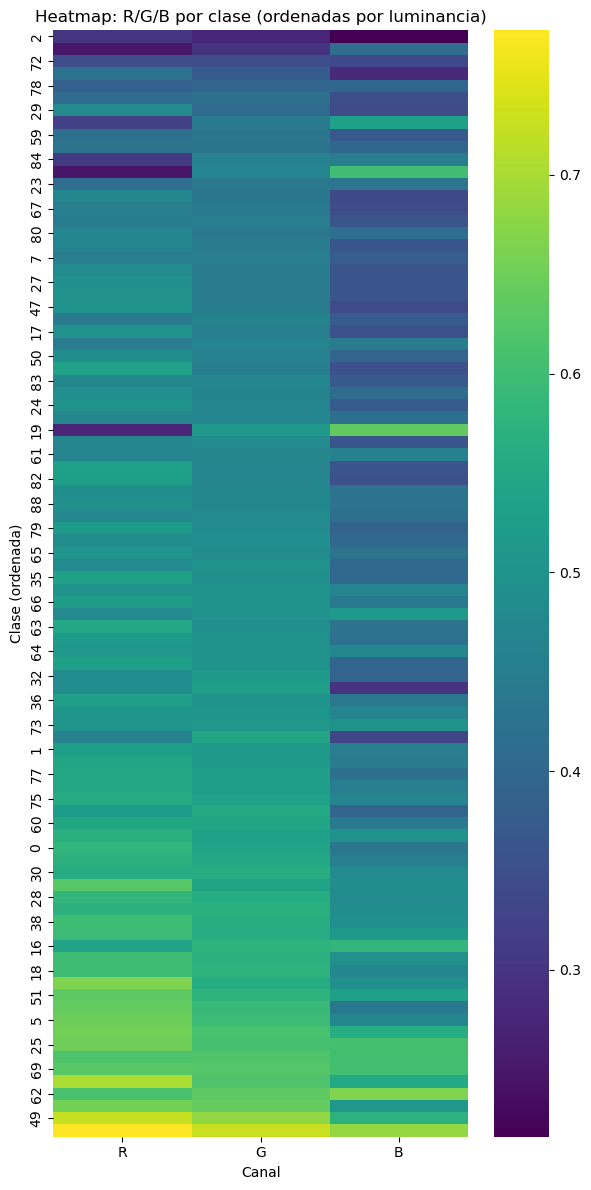

In [14]:
import seaborn as sns
# Ordenar df_norm completo por luminancia
df_sorted = df_norm.sort_values('luminance')

# Ahora pasamos solo R, G, B al heatmap
plt.figure(figsize=(6, 12))
sns.heatmap(df_sorted[['R','G','B']], annot=False, cmap='viridis')
plt.title('Heatmap: R/G/B por clase (ordenadas por luminancia)')
plt.xlabel('Canal')
plt.ylabel('Clase (ordenada)')
plt.tight_layout()
plt.savefig(plots_dir / "heatmap_by_class.png")
plt.show()


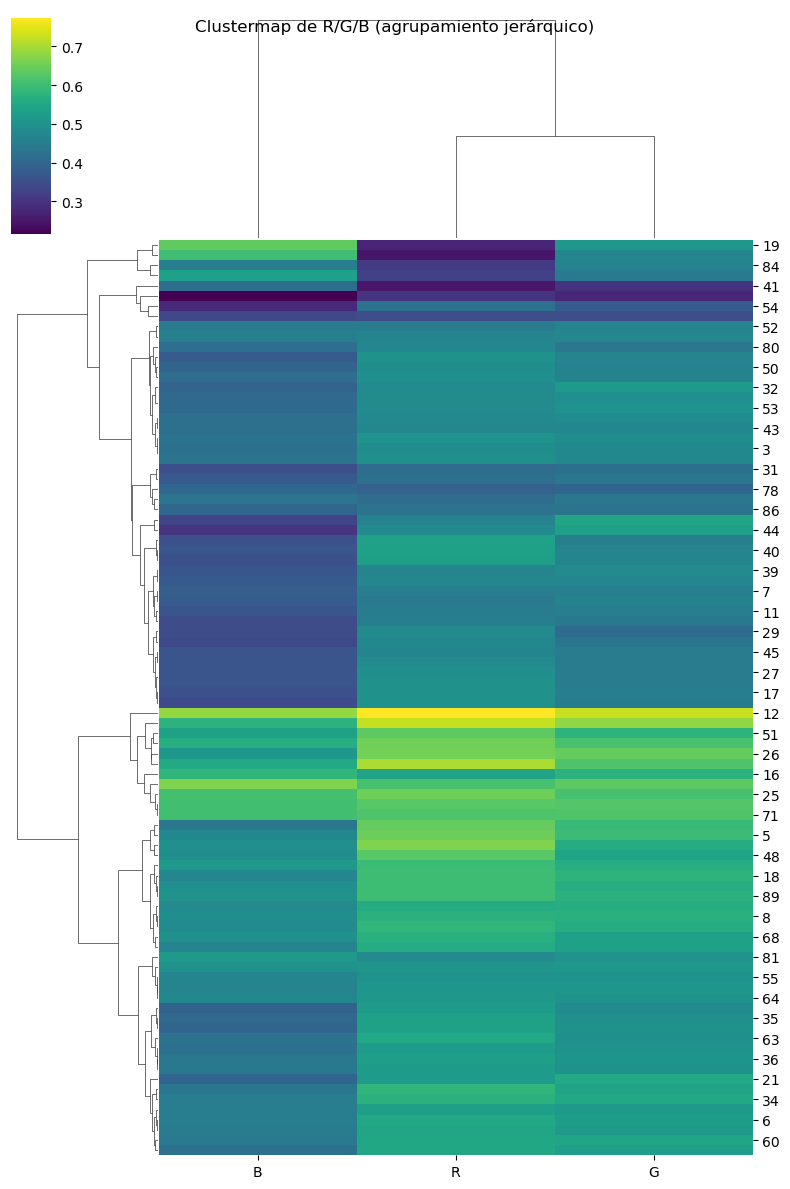

In [15]:
sns.clustermap(
    df_norm[['R','G','B']], 
    method='ward', metric='euclidean', 
    cmap='viridis', figsize=(8,12)
)
plt.suptitle('Clustermap de R/G/B (agrupamiento jerárquico)')
plt.savefig(plots_dir / "clustermap_rgb.png")
plt.show()


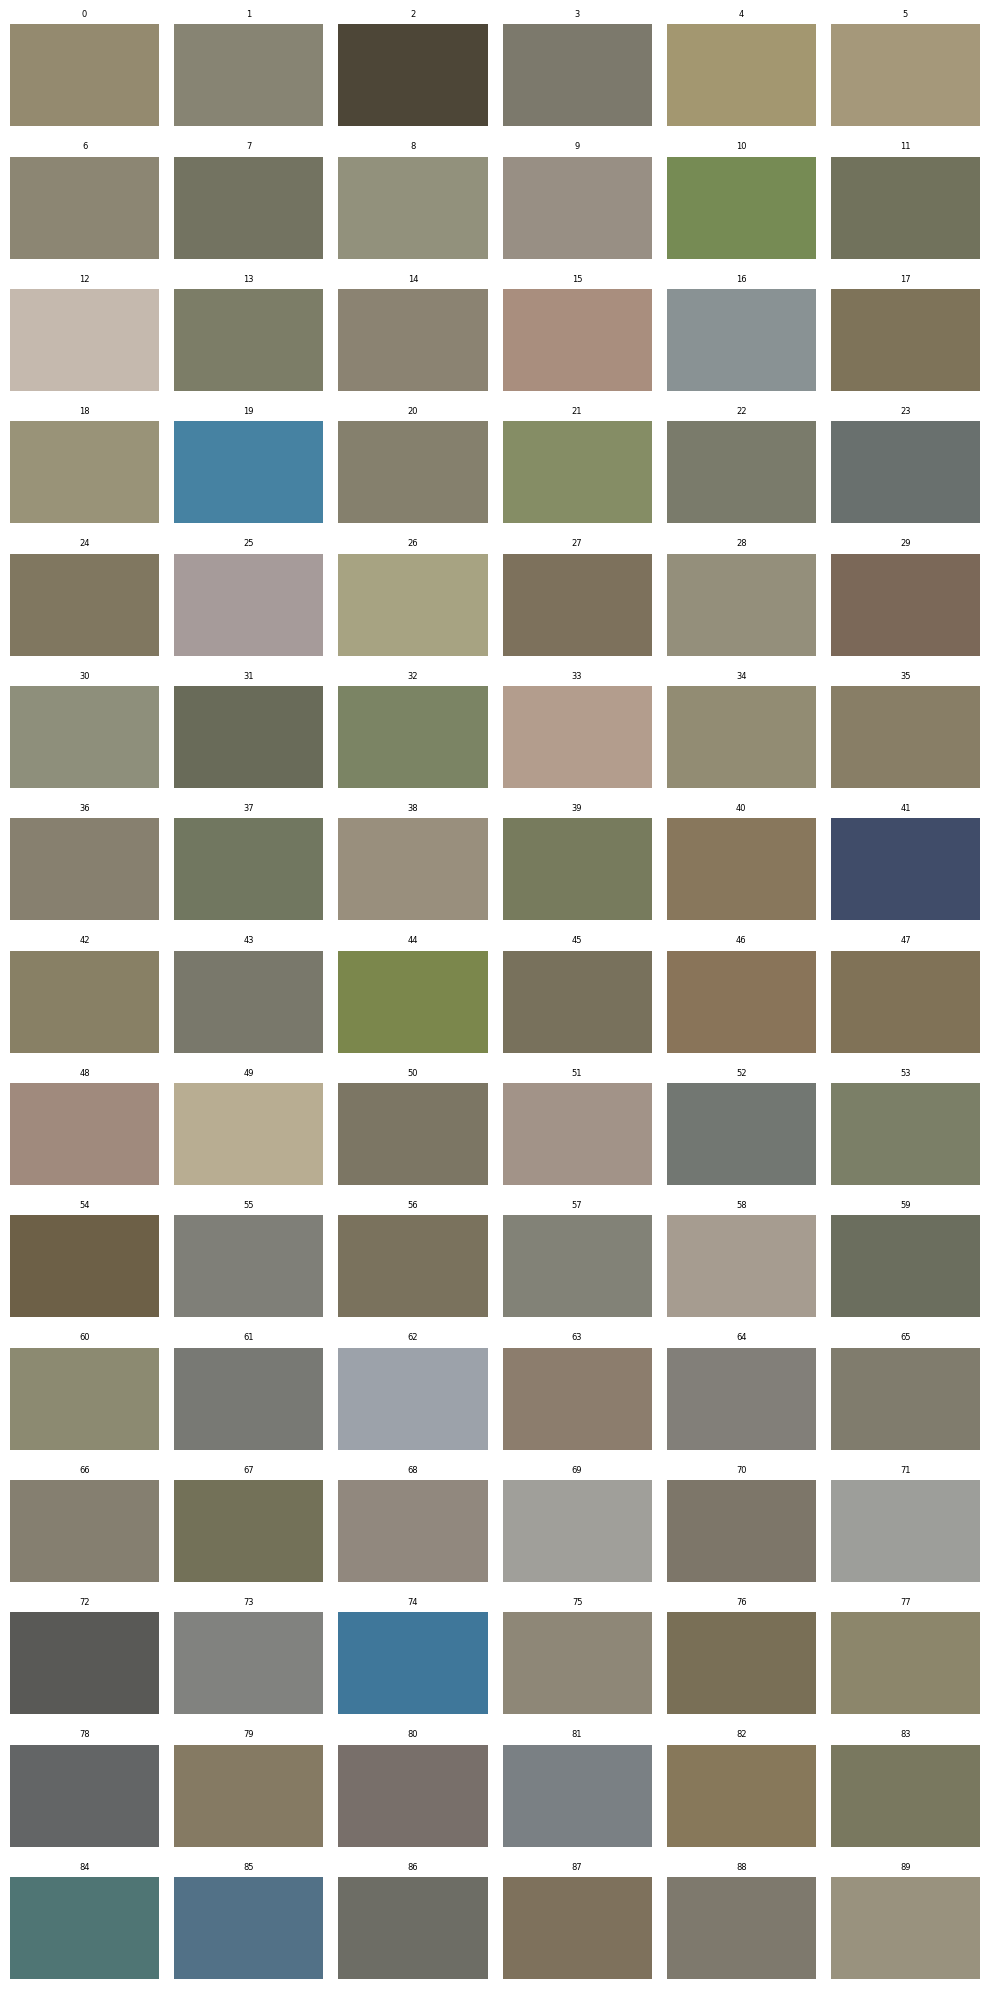

In [16]:
fig, axes = plt.subplots(nrows=15, ncols=6, figsize=(10, 20))  # ajustar rows/cols
axes = axes.flatten()
for ax_i, (cls, row) in zip(axes, df.iterrows()):
    ax_i.axis('off')
    ax_i.set_title(cls, fontsize=6)
    ax_i.add_patch(plt.Rectangle((0,0),1,1, color=row[['R','G','B']]/255.0))
plt.tight_layout()
plt.savefig(plots_dir / "color_averages.png")
plt.show()

In [ ]:
import pytorch_lightning as pl
from torchvision import transforms, datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from torch import nn, optim
from torchvision import models

# NumPy
np.random.seed(42)

# PyTorch CPU
torch.manual_seed(42)

class AnimalsDataModule(pl.LightningDataModule):
    def __init__(self, data_dir='.', batch_size=32, num_workers=8):
        super().__init__()
        self.data_dir = data_dir
        self.batch_size = batch_size
        self.num_workers = num_workers
        #Hay que cambiar los transforms porque las imagenes han sido entrenadas con resize 224 x 224
        self.transform = transforms.Compose([
                            transforms.Resize((32,32)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                 std=[0.229, 0.224, 0.225])
                        ])

    def setup(self, stage=None):
        full_dataset = datasets.ImageFolder(self.data_dir, transform=self.transform)

        train_size = int(len(full_dataset)*0.6)
        val_size = int(len(full_dataset)*0.2)
        test_size = len(full_dataset) - train_size - val_size

        self.train_data, self.val_data, self.test_data = random_split(full_dataset, [train_size, val_size, test_size])

    def train_dataloader(self):
        return DataLoader(self.train_data,
                          batch_size=self.batch_size,
                          num_workers=self.num_workers,
                          persistent_workers=True,
                          shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.val_data,
                          batch_size=self.batch_size,
                          num_workers=self.num_workers,
                          persistent_workers=True,
                          shuffle=False)

    def test_dataloader(self):
        return DataLoader(self.test_data,
                          batch_size=self.batch_size,
                          num_workers=self.num_workers,
                          persistent_workers=True,
                          shuffle=False)

class VGGNet(pl.LightningModule):
    def __init__(self,num_clases = 90, pretrained=True, lr=1e-3):
        super().__init__()
        self.vgg = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1 if pretrained else None)

         # Congelar capas si quieres transfer learning 
        for param in self.vgg.features.parameters(): #congelar --> No actualiza los pesos de las primeras capas convulocionales (Conveniente porque nuestro dataset es pequeño (<10000 imagenes)
                                                    #Así evitamos riesgo de overfitting
            param.requires_grad = False
        
        # Reemplazar la última capa del clasificador
        in_features = self.vgg.classifier[6].in_features
        self.vgg.classifier[6] = nn.Linear(in_features, num_clases)

        self.loss_fn = nn.CrossEntropyLoss()
        self.lr = lr

    def forward(self, x):
        return self.vgg(x)

    def training_step(self, batch, batch_idx):
        xb, yb = batch
        out = self(xb)
        loss = self.loss_fn(out, yb)
        #Guardamos la perdida del entrenamiento
        self.log("train_loss", loss)
        return loss

    def validation_step(self, batch, batch_idx):
        xb, yb = batch
        out = self(xb)
        preds = out.argmax(1)
        acc = (preds == yb).float().mean()
        self.log('val_acc', acc, prog_bar=True)

    def test_step(self, batch, batch_idx):
        xb, yb = batch
        out = self(xb)
        preds = out.argmax(1)
        acc = (preds == yb).float().mean()
        self.log('test_acc', acc, prog_bar=True, on_epoch=True)

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr = self.lr)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Training and evaluation
data_module = AnimalsDataModule(data_dir=full_animals_dir)
data_module.setup()
# print(len(data_module.train_data.dataset.classes))
# Número de clases
num_classes = len(data_module.train_data.dataset.classes)

net = VGGNet(num_clases = num_classes).to(device)
trainer = pl.Trainer(max_epochs=3, accelerator="gpu", )#, devices=4, strategy='ddp_spawn')
trainer.fit(net, datamodule=data_module)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
C:\Users\Rober\miniconda3\envs\ufc\Lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params | Mode 
---------------------------------------------------

Sanity Checking: |                                                                               | 0/? [00:00<…

In [ ]:
def get_sample_class_probabilities(model, dataloader, device='cpu'):
    model.eval()
    probs_list = []
    targets_list = []
    
    with torch.no_grad():
        for xb, yb in dataloader:
            xb = xb.to(device)
            out = model(xb)
            probs = nn.functional.softmax(out, dim=1)
            probs_list.append(probs.cpu())
            targets_list.append(yb)
            
    probs_all = torch.cat(probs_list, dim=0)
    targets_all = torch.cat(targets_list, dim=0)
    return probs_all, targets_all

In [ ]:
val_loader = data_module.val_dataloader()
val_probs, val_targets = get_sample_class_probabilities(net, val_loader)
print(val_probs.shape)    # [num_val_samples, num_classes]
print(val_targets.shape)  # [num_val_samples]

In [ ]:
print(trainer.validate(net, datamodule=data_module))

In [ ]:
# Evaluación en test
trainer.test(net, datamodule=data_module)